In [20]:
# ===============================
# Disease Prediction Toolkit
# Dataset: Heart Disease (UCI style)
# Author: Your Name
# ===============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)

In [21]:
df = pd.read_csv(r"C:\Users\admin\Desktop\disease-prediction-toolkit\heart.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# 3. Basic Data Info
print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTarget value counts:")
print(df['target'].value_counts())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
tha

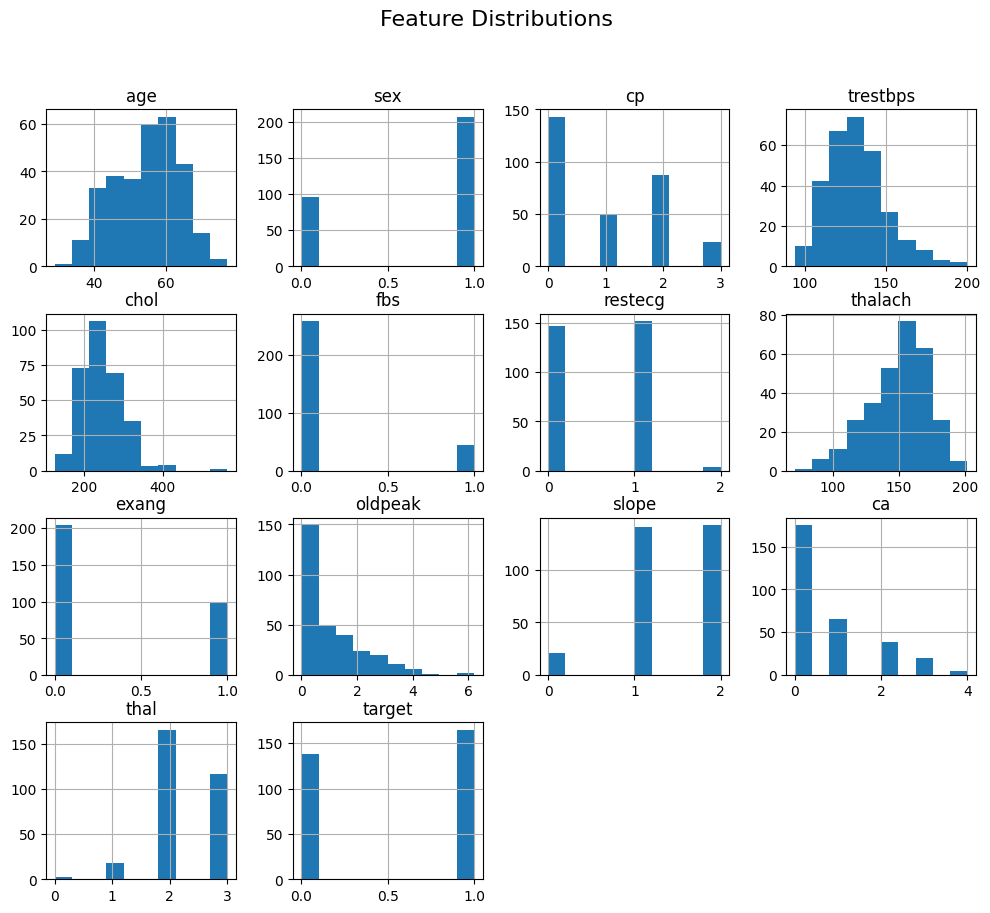

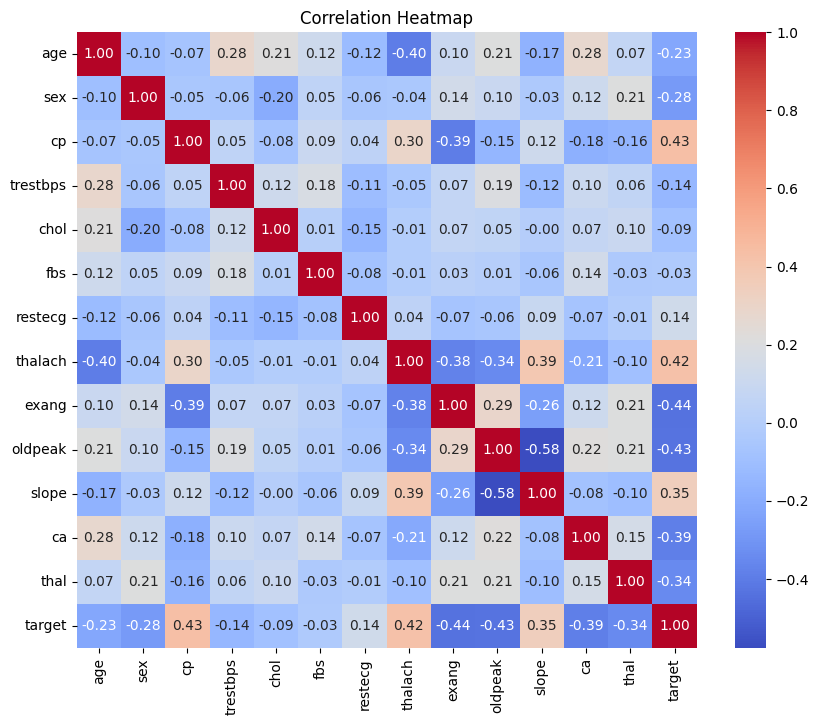

In [23]:
# 4. Exploratory Data Analysis (EDA)

# Histograms
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Numeric features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Categorical features: []
✅ Model saved as disease_model.pkl

Model: Logistic Regression
Accuracy: 0.803
Precision: 0.769
Recall: 0.909
F1 Score: 0.833
ROC AUC: 0.869


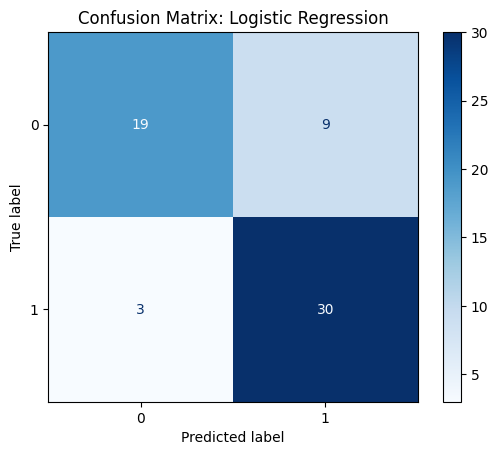


Model: Decision Tree
Accuracy: 0.705
Precision: 0.703
Recall: 0.788
F1 Score: 0.743
ROC AUC: 0.698


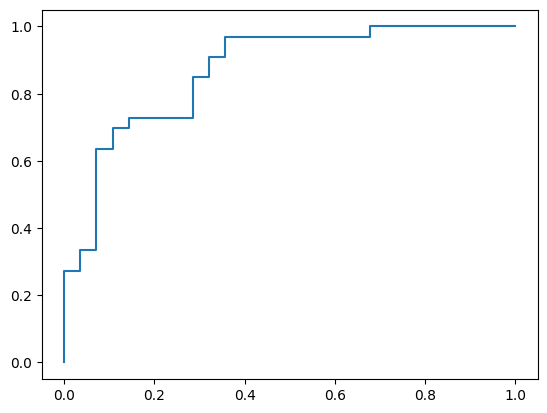

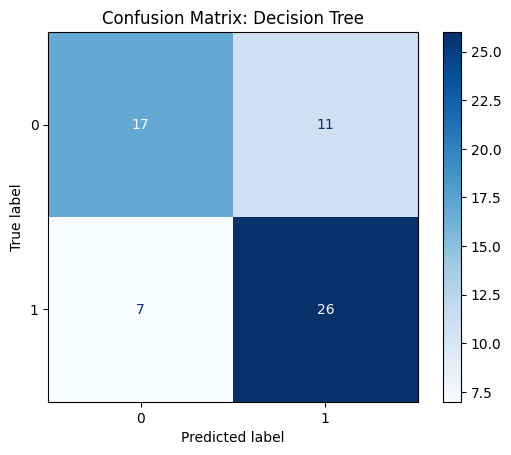


Model: Random Forest
Accuracy: 0.836
Precision: 0.780
Recall: 0.970
F1 Score: 0.865
ROC AUC: 0.909


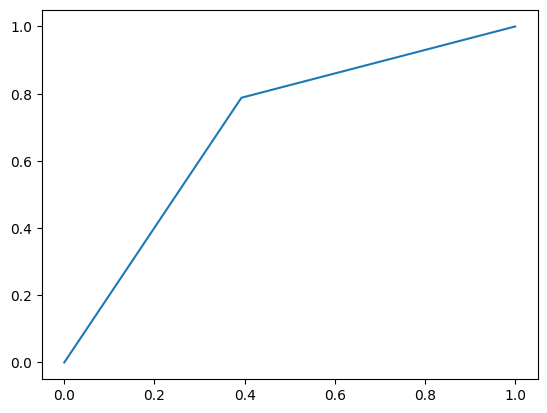

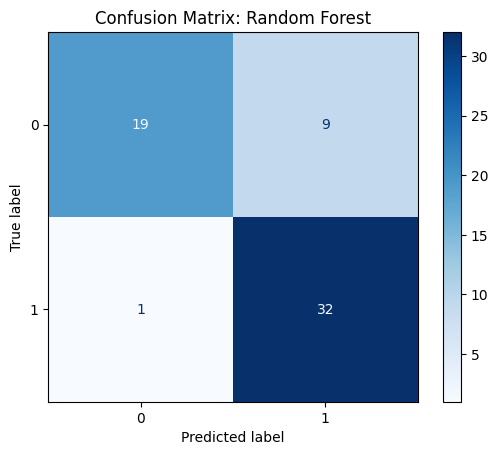

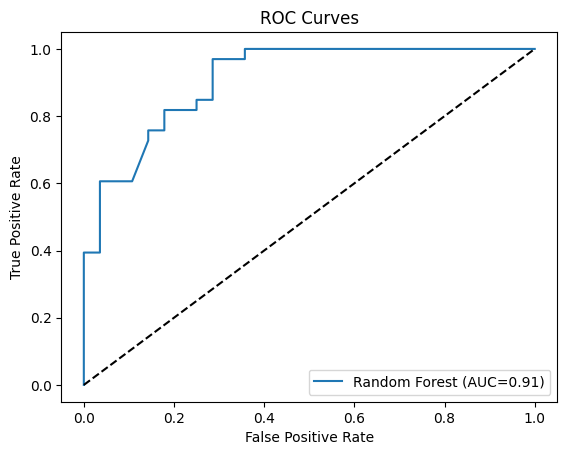

In [24]:
# 5. Feature & Target Split
X = df.drop("target", axis=1)
y = df["target"]

# Identify numeric and categorical columns
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


# 8. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

import joblib

# Train final best model (Random Forest here)
best_model = Pipeline(steps=[("preprocessor", preprocessor),
                             ("classifier", RandomForestClassifier(random_state=42))])
best_model.fit(X, y)

# Save the model
joblib.dump(best_model, "disease_model.pkl")
print("✅ Model saved as disease_model.pkl")




# 9. Train & Evaluate Models
results = []

for name, model in models.items():
    # Create pipeline
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                         ("classifier", model)])
    
    # Train
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results.append([name, acc, prec, rec, f1, auc])
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")
    if auc:
        print(f"ROC AUC: {auc:.3f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()
    
    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()



In [25]:
# 10. Compare Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC AUC"])
results_df


,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Logistic Regression,0.803279,0.769231,0.909091,0.833333,0.869048
1,Decision Tree,0.704918,0.702703,0.787879,0.742857,0.697511
2,Random Forest,0.836066,0.780488,0.969697,0.864865,0.909091
